<a href="https://colab.research.google.com/github/reksh21/AI-Capstone-Project/blob/main/Employee_Attrition_Rekha_Shree_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

**Predicting Employee Attrition** - *To Predict Whether the employees Leave the Company or Not*

Employees are the most important part of an organization. Successful employees meet deadlines, make sales, and build the brand through positive customer interactions.

Employee attrition is a major cost to an organization and predicting such attritions is the most important requirement of the Human Resources department in many organizations. In this problem, your task is to predict the attrition of employees of an organization.

# Importing Libraries

In [ ]:
import pandas as pd                                                                                        #Data manipulation and analysis
import numpy as np                                                                                         #Scientific computing and array operations
import seaborn as sb                                                                                       #Create informative and aesthetically pleasing data visualizations
import matplotlib.pyplot as plt                                                                            #Creating various visualizations

import plotly.graph_objs as go                                                                             #Interactive web-based visualizations
from plotly.offline import iplot                                                                           #Display plotly visualizations offline
import plotly.graph_objects as go

from scipy.stats import chi2_contingency                                                                   #Assess the independence between categorical variables

from sklearn.preprocessing import LabelEncoder                                                             #Convert categorical data into numerical labels.
!pip install category_encoders
import category_encoders as ce
from imblearn.over_sampling import SMOTE                                                                   #Synthetic Minority Oversampling Technique
from sklearn.model_selection import train_test_split                                                       #Split arrays or matrices into random train and test subsets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix      #Evaluation metrics

from sklearn.linear_model import LogisticRegression                                                        #Logistic Regression
from sklearn.tree import DecisionTreeClassifier                                                            #Decision Tree
from sklearn import tree                                                                                   #Visualize decision trees
from sklearn.ensemble import RandomForestClassifier                                                        #Random Forest
from xgboost import XGBClassifier                                                                          #XGBoost

import joblib                                                                                              #Save and load trained models

# Loading Dataset

In [ ]:
dataset = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
dataset

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

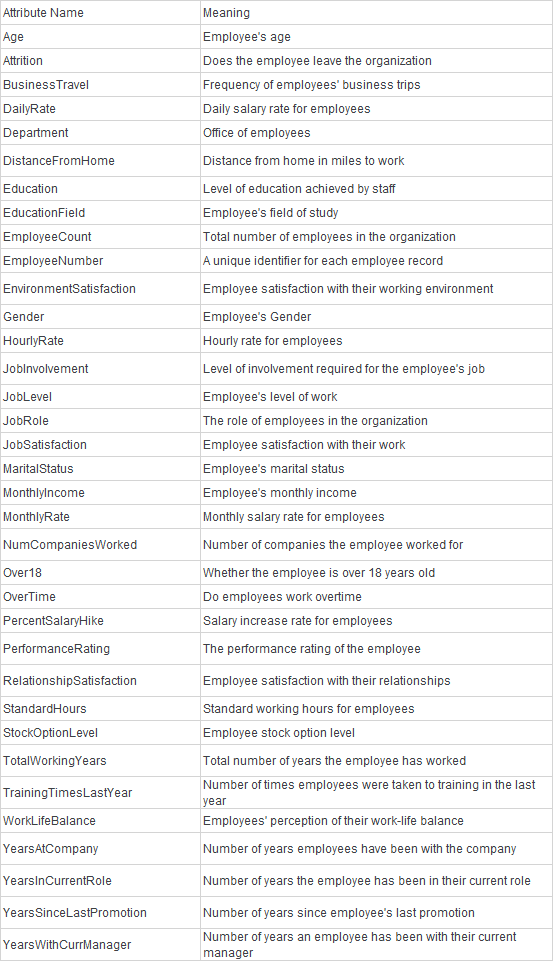

Education: 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating: 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

# Exploratory Data Analysis (EDA)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are 35 columns and 1470 rows in the dataset. In which 34 are features, 1 target variable.

Out of the 34 available features, 8 of them are in the form of objects and the rest are in the form of integer type.

In [ ]:
dataset.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [ ]:
dataset.duplicated().any()

False

* There is no missing value and duplicate rows in dataset.
* Some of columns can be removed, because their values do not affect the analysis results.
  * **Over18:** All values are Y
  * **EmployeeCount:** all values are 1.0
  * **StandardHours:** all values are 80.0
  * **EmployeeNumber:** is the id of the employee that their values do not affect the analysis results.

In [ ]:
# Droping the Unwanted Columns from the dataset
dataset1 = dataset.drop(['Over18', 'EmployeeNumber','EmployeeCount','StandardHours'],axis=1)

In [ ]:
dataset1.describe(include=object).T

count unique                     top  freq
Attrition       1470      2                      No  1233
BusinessTravel  1470      3           Travel_Rarely  1043
Department      1470      3  Research & Development   961
EducationField  1470      6           Life Sciences   606
Gender          1470      2                    Male   882
JobRole         1470      9         Sales Executive   326
MaritalStatus   1470      3                 Married   673
OverTime        1470      2                      No  1054

In [ ]:
dataset1['Attrition'] = dataset1['Attrition'].factorize(['No','Yes'])[0]
dataset1.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

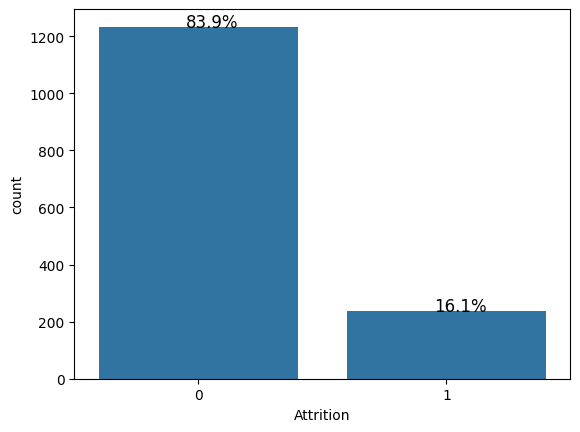

In [ ]:
# Calculate percentages
total = len(dataset1)
ax = sb.countplot(data=dataset1, x='Attrition')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)

plt.show()

**Finding Relationship Among the Numerical Features using Correlation Matrix**

<Axes: >

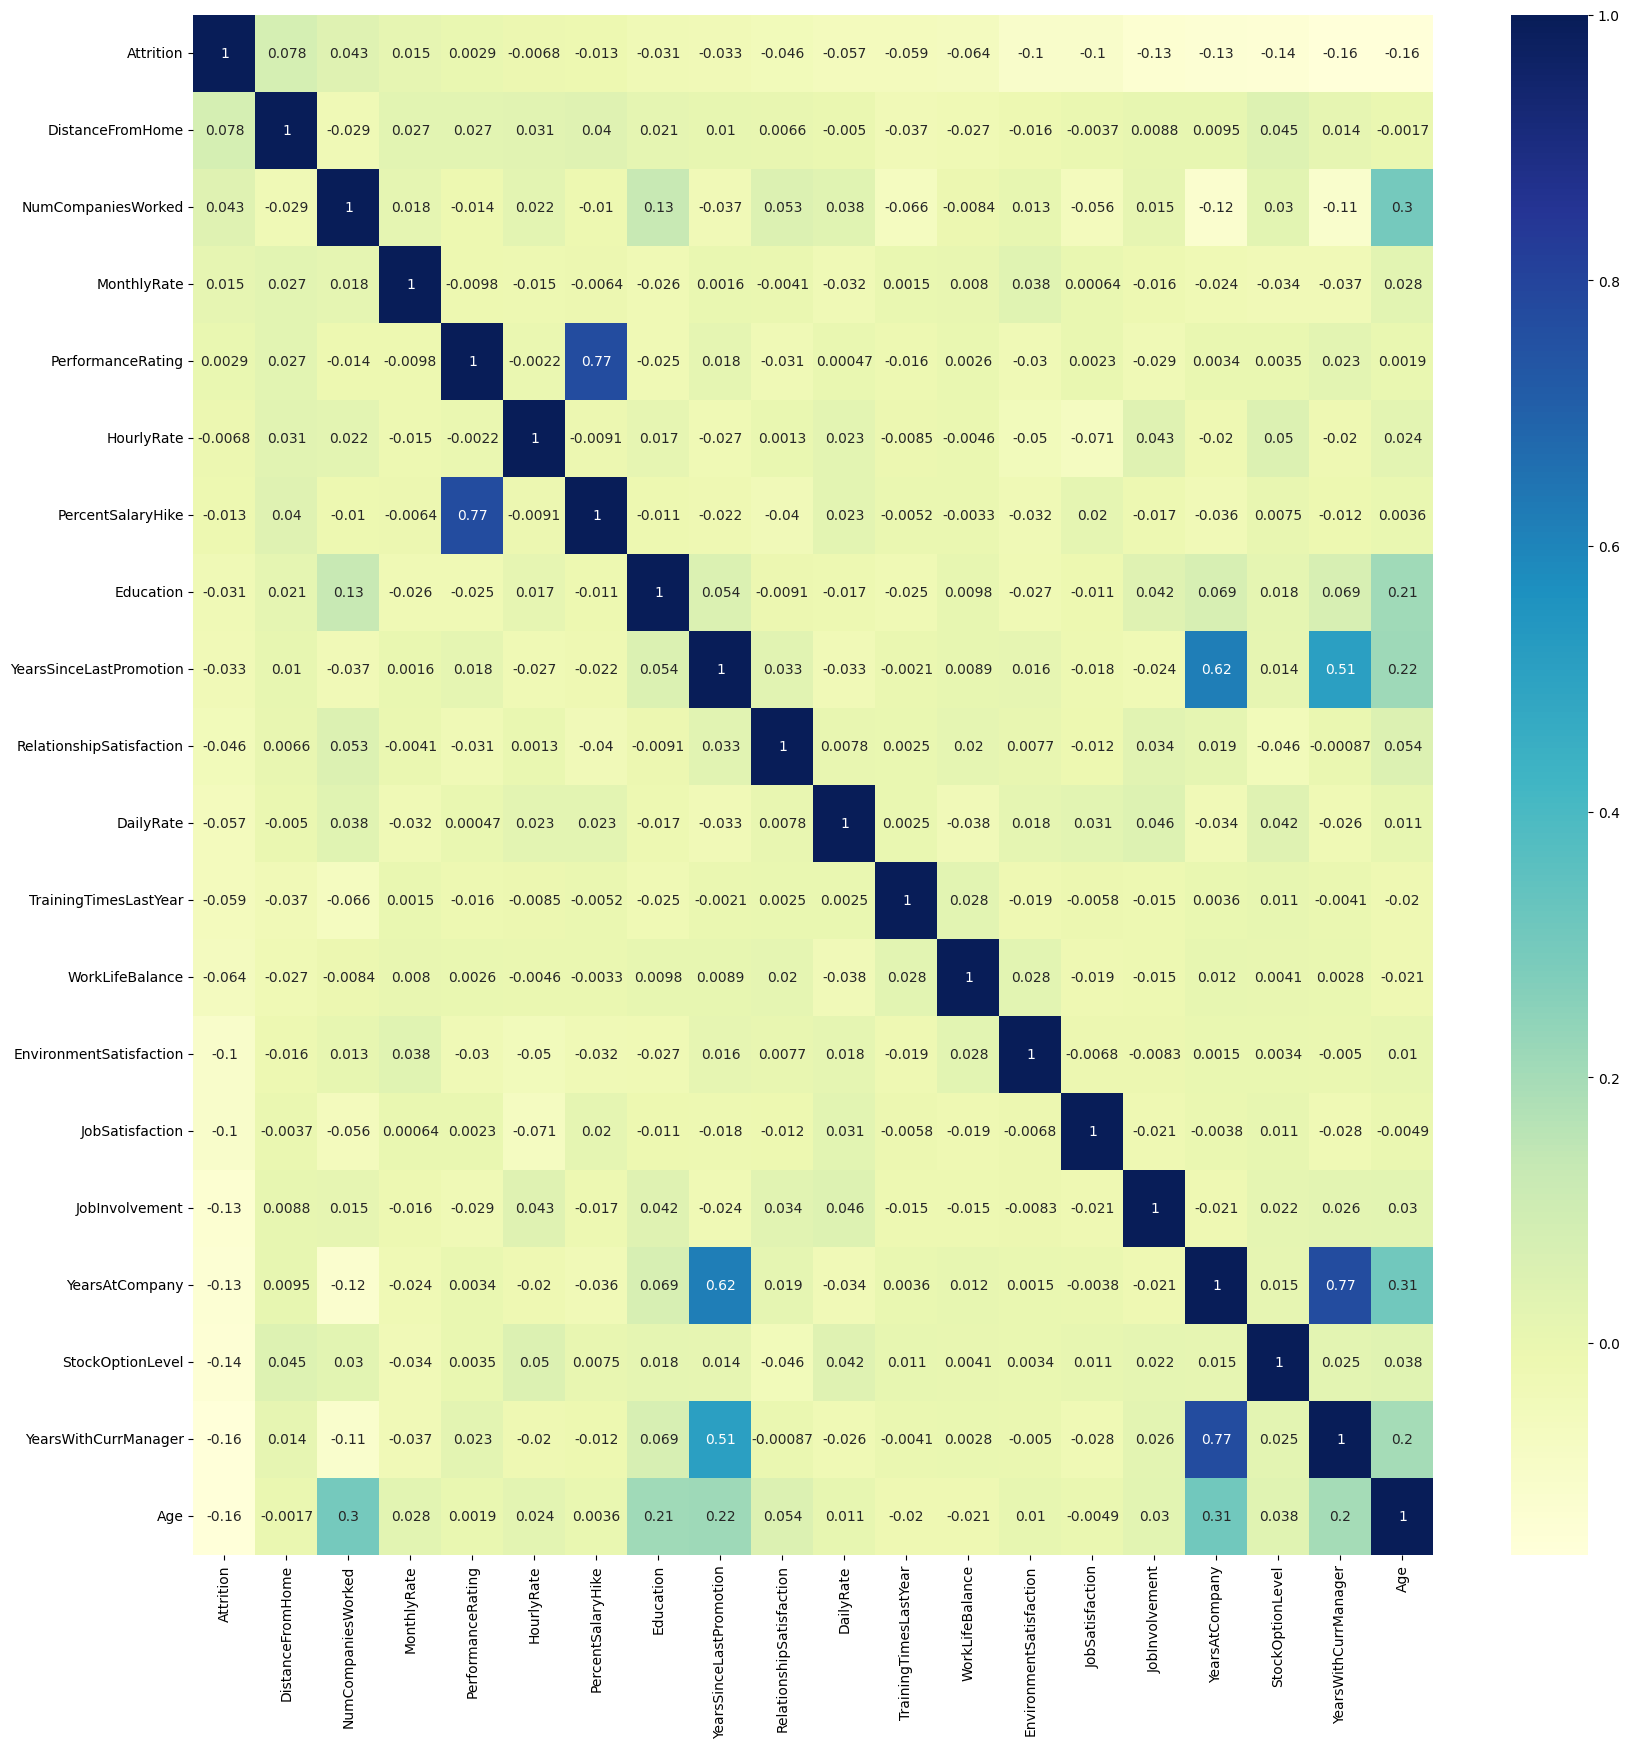

In [ ]:
numeric_cols = dataset1.select_dtypes(include=['number']).columns
col = dataset1[numeric_cols].corr().nlargest(20, "Attrition").Attrition.index

plt.figure(figsize=(20, 20))
sb.heatmap(dataset1[col].corr(), annot=True, cmap="YlGnBu", annot_kws={"size":10})

* PerformanceRating and PercentSalaryHike are Highly correlated with 0.77 where
we can drop PercentSalaryHike as its correlation is slightly lower than PerformanceRating with Attrition.
* YearsatCompany and YearsWithCurrManager are Highly correlated with 0.77 where we can drop YearsWithCurrManager.


**Finding Relationship Among the Categorical Features using Chi-Square**

In [ ]:
def perform_chi_square_test(data, target_column, categorical_columns):
  """
  Performs chi-square test for all categorical columns in data with respect to target_column.

  Args:
    data: Pandas DataFrame containing the data.
    target_column: Name of the target column.
    categorical_columns: List of categorical column names.

  Returns:
    DataFrame containing chi-square test results.
  """

  chi_square_results = []
  for col in categorical_columns:
    crosstab = pd.crosstab(data[col], data[target_column])
    stat, p, dof, expected = chi2_contingency(crosstab)
    chi_square_results.append({
      "Column": col,
      "Chi-Square Statistic": stat,
      "P-Value": p,
      "Degrees of Freedom": dof
    })
  return pd.DataFrame(chi_square_results)

# Perform chi-square test
categorical_cols = dataset1.select_dtypes(include='object').columns
chi_square_df = perform_chi_square_test(dataset1, "Attrition", categorical_cols)


fig = go.Figure()

fig.add_trace(go.Bar(
    x=chi_square_df["Column"],
    y=chi_square_df["P-Value"],
    marker_color="gold"
))

fig.update_layout(
    title="Chi-Square Test Results for Categorical Columns",
    xaxis_title="Column",
    yaxis_title="P-Value"
)

fig.show()


**Filtering Out the features which P-value is less than or equal to 0.05**

In [ ]:
significant_features = chi_square_df[chi_square_df["P-Value"] <= 0.05]["Column"].tolist()

print("Features with p-value <= 0.05:")
for feature in significant_features:
    print(f"\t- {feature}")


Features with p-value <= 0.05:
	- BusinessTravel
	- Department
	- EducationField
	- JobRole
	- MaritalStatus
	- OverTime


In [ ]:
dataset2 = dataset1.drop(['Gender'],axis=1)

In [ ]:
dataset2.describe()

Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810     0.161224   802.485714          9.192517     2.912925   
std       9.135373     0.367863   403.509100          8.106864     1.024165   
min      18.000000     0.000000   102.000000          1.000000     1.000000   
25%      30.000000     0.000000   465.000000          2.000000     2.000000   
50%      36.000000     0.000000   802.000000          7.000000     3.000000   
75%      43.000000     0.000000  1157.000000         14.000000     4.000000   
max      60.000000     1.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.750000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  ...  PerformanceRating  RelationshipSatisfaction  \
count      1470.000000  ...        1470.000000               1470.000000   
mean          2.728571  ...           3.153741                  2.712245   
std           1.102846  ...           0.360824                  1.081209   
min           1.000000  ...           3.000000                  1.000000   
25%           2.000000  ...           3.000000                  2.000000   
50%           3.000000  ...           3.000000                  3.000000   
75%           4.000000  ...           3.000000                  4.000000   
max           4.000000  ...           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 24 columns]

**Separating Features and Label in a separate dataframe**

In [ ]:
df_features = dataset2.drop(['Attrition'],axis=1)
df_label = dataset2['Attrition']

In [ ]:
df_features.shape

(1470, 29)

In [ ]:
df_label.shape

(1470,)

**Converting Categorical column to Numerical features using Label Encoder**

In [ ]:
le = LabelEncoder()

df_features_encoded = df_features.copy()
categorical_columns = df_features_encoded.select_dtypes(include='object').columns

for col in categorical_columns:
    df_features_encoded[col] = le.fit_transform(df_features_encoded[col])

df_features_encoded.head(5)


Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0   41               2       1102           2                 1          2   
1   49               1        279           1                 8          1   
2   37               2       1373           1                 2          2   
3   33               1       1392           1                 3          4   
4   27               2        591           1                 2          1   

   EducationField  EnvironmentSatisfaction  HourlyRate  JobInvolvement  ...  \
0               1                        2          94               3  ...   
1               1                        3          61               2  ...   
2               4                        4          92               2  ...   
3               1                        4          56               3  ...   
4               3                        1          40               3  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 29 columns]

**Converting the Categorical Features into Binary form using One-Hot Encoding suitable for Machine Learning Model to Train**

In [ ]:
encoder = ce.OneHotEncoder(cols=categorical_columns)
df_features_encoded = encoder.fit_transform(df_features_encoded)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


In [ ]:
df_features_encoded.head(5)

Age  BusinessTravel_1  BusinessTravel_2  BusinessTravel_3  DailyRate  \
0   41                 1                 0                 0       1102   
1   49                 0                 1                 0        279   
2   37                 1                 0                 0       1373   
3   33                 0                 1                 0       1392   
4   27                 1                 0                 0        591   

   Department_1  Department_2  Department_3  DistanceFromHome  Education  ...  \
0             1             0             0                 1          2  ...   
1             0             1             0                 8          1  ...   
2             0             1             0                 2          2  ...   
3             0             1             0                 3          4  ...   
4             0             1             0                 2          1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 49 columns]

# Prepare dataset

**Data Balancing using SMOTE :**

Machine learning models often rely on balanced datasets, where the number of data points representing each class (category) is roughly equal. However, real-world data can be imbalanced, meaning one class has significantly fewer data points than others. This can be problematic because models might favor the majority class and perform poorly on the minority class.

From the Given Dataset, we have observed that the dataset is highly imbalanced.To addresses imbalance Isuue, We are using SMOTE(Synthetic Minority Oversampling Technique), an oversampling technique to increase the number of data points in the minority class.


In [ ]:
oversampler = SMOTE(sampling_strategy= 'auto',random_state=1234)
X_resampled,Y_resampled=oversampler.fit_resample(df_features_encoded,df_label)

In [ ]:
X_resampled.shape

(2466, 49)

In [ ]:
Y_resampled.shape, Y_resampled.value_counts()

((2466,),
 Attrition
 1    1233
 0    1233
 Name: count, dtype: int64)

In [ ]:
df_label.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [ ]:
X_resampled.head(5)

Age  BusinessTravel_1  BusinessTravel_2  BusinessTravel_3  DailyRate  \
0   41                 1                 0                 0       1102   
1   49                 0                 1                 0        279   
2   37                 1                 0                 0       1373   
3   33                 0                 1                 0       1392   
4   27                 1                 0                 0        591   

   Department_1  Department_2  Department_3  DistanceFromHome  Education  ...  \
0             1             0             0                 1          2  ...   
1             0             1             0                 8          1  ...   
2             0             1             0                 2          2  ...   
3             0             1             0                 3          4  ...   
4             0             1             0                 2          1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 49 columns]

In [ ]:
Y_resampled.head(5)

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

**Split the data into Training set and Testing set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=1234, stratify=Y_resampled)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1972, 49)
y_train shape: (1972,)
X_test shape: (494, 49)
y_test shape: (494,)


In [ ]:
y_train.value_counts()

Attrition
1    986
0    986
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

Attrition
0    247
1    247
Name: count, dtype: int64

# Machine Learning Models

In [ ]:
# Creating a function for predicting Training and Test Dataset
def predicttrain(model):
    model.fit(X_train, y_train)
    print('Training Accuracy:')
    y_predict = model.predict(X_train)
    print('Accuracy: %.2f%%' % (accuracy_score(y_train, y_predict) * 100 ))
    print('Precision: %.2f%%' % (precision_score(y_train, y_predict) * 100))
    print('Recall: %.2f%%' % (recall_score(y_train, y_predict) * 100))
    print('F1_Score: %.2f%%' % (f1_score(y_train, y_predict) * 100))
    confusion_matrix_model = confusion_matrix(y_train, y_predict)
    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])


def predicttest(model):
    print('Test Accuracy:')
    y_predict = model.predict(X_test)
    print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_predict) * 100 ))
    print('Precision: %.2f%%' % (precision_score(y_test, y_predict) * 100))
    print('Recall: %.2f%%' % (recall_score(y_test, y_predict) * 100))
    print('F1_Score: %.2f%%' % (f1_score(y_test, y_predict) * 100))
    confusion_matrix_model = confusion_matrix(y_test, y_predict)
    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

**Logistic Regression**

'liblinear' solver is used for sparse datasets (datasets with many zero values) and works well with L1 or L2 regularization (penalties).

'l1' refers to L1 regularization, which adds a penalty equal to the absolute value of the coefficients (weights) of the model.

In [ ]:
log_Reg = LogisticRegression(solver='liblinear', penalty='l1')

In [ ]:
# Saving the model
joblib.dump(log_Reg, 'Logistic Regression.pkl')

['Logistic Regression.pkl']

Training Accuracy:
Accuracy: 93.46%
Precision: 96.73%
Recall: 89.96%
F1_Score: 93.22%


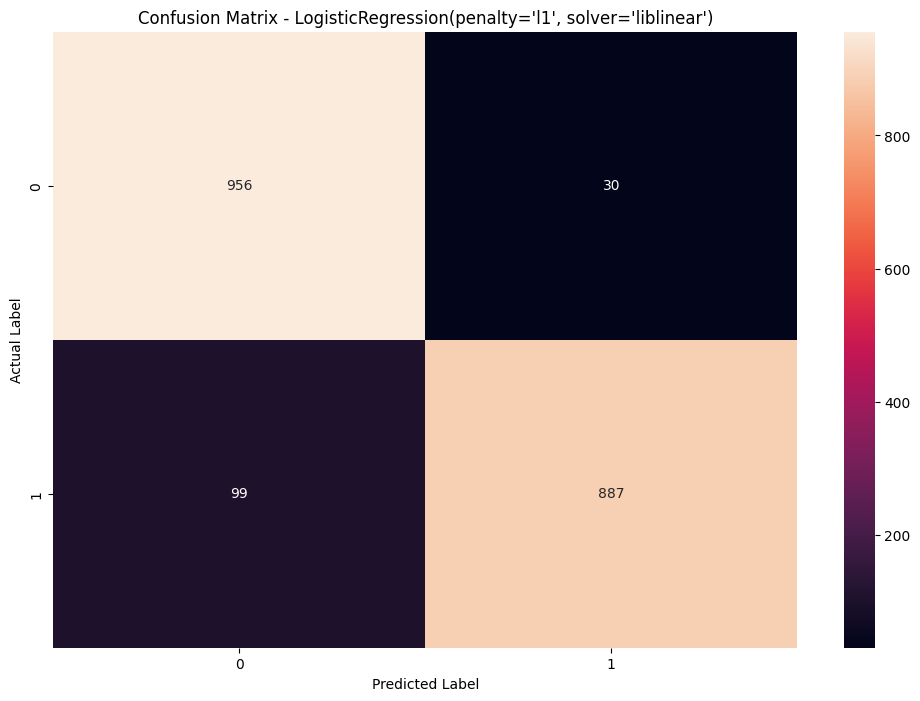

In [ ]:
predicttrain(log_Reg)

Test Accuracy:
Accuracy: 91.90%
Precision: 96.83%
Recall: 86.64%
F1_Score: 91.45%


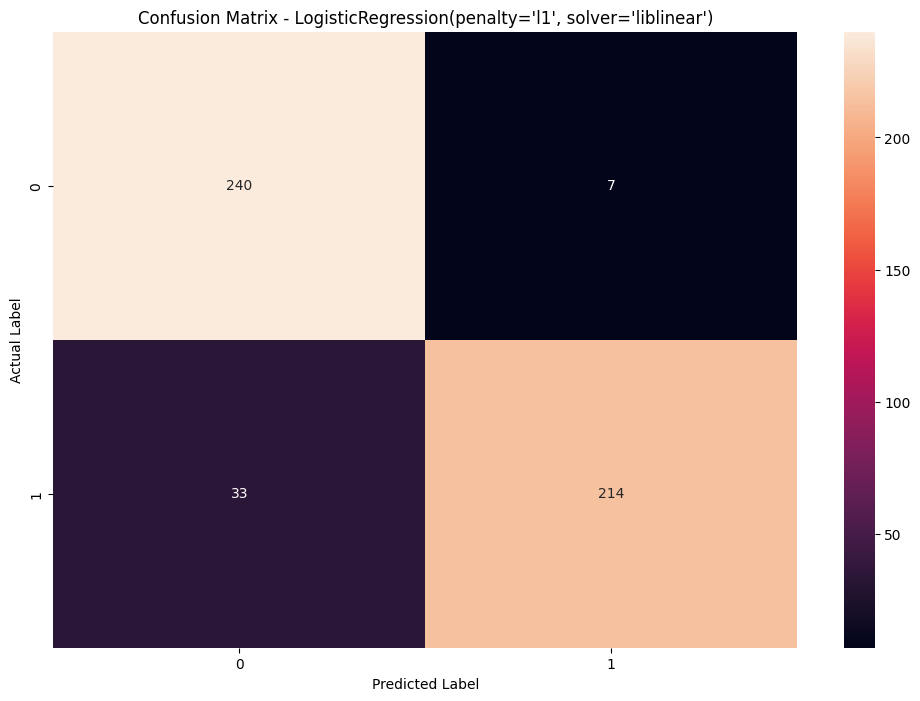

In [ ]:
predicttest(log_Reg)

**Decision Tree Classifier**

Here we are trying out different Depth of the tree which explores the impact of the max_depth parameter on the decision tree's performance and visualizes the results. By analyzing the plot, we can see how training and testing accuracy change with increasing tree depth and identify the max_depth value that might lead to the best generalization (performance on unseen data).

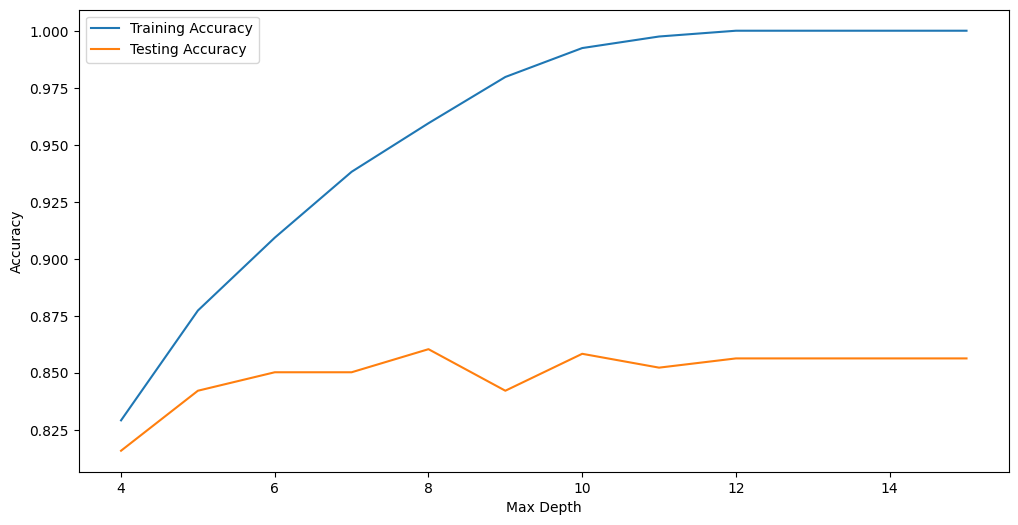

In [ ]:
# Define the range of max_depth values to iterate over
max_depths = range(4, 16)

# Initialize empty lists to store training and testing accuracy scores
train_accuracy = []
test_accuracy = []

# Loop through each max_depth value
for max_depth in max_depths:
    # Create a new decision tree classifier with the current max_depth
    decision_tree1 = DecisionTreeClassifier(random_state=1000, max_depth=max_depth, min_samples_leaf=1)

    # Fit the model on the training data
    decision_tree1.fit(X_train, y_train)

    # Calculate and store training and testing accuracy scores
    train_accuracy.append(decision_tree1.score(X_train, y_train))
    test_accuracy.append(decision_tree1.score(X_test, y_test))

# Plot the training and testing accuracy scores against max_depth
plt.figure(figsize=(12, 6))
plt.plot(max_depths, train_accuracy, label="Training Accuracy")
plt.plot(max_depths, test_accuracy, label="Testing Accuracy")

# Add legend and axis labels
plt.legend()
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")

# Show the plot
plt.show()


While Observing the Graph, we can see that the Gap between Training and Test Accuracy is low and Considerable on Max-Depth= 7.

In [ ]:
decision_Tree = DecisionTreeClassifier(random_state = 1000,max_depth = 7,min_samples_leaf = 1)

Training Accuracy:
Accuracy: 93.81%
Precision: 95.96%
Recall: 91.48%
F1_Score: 93.67%


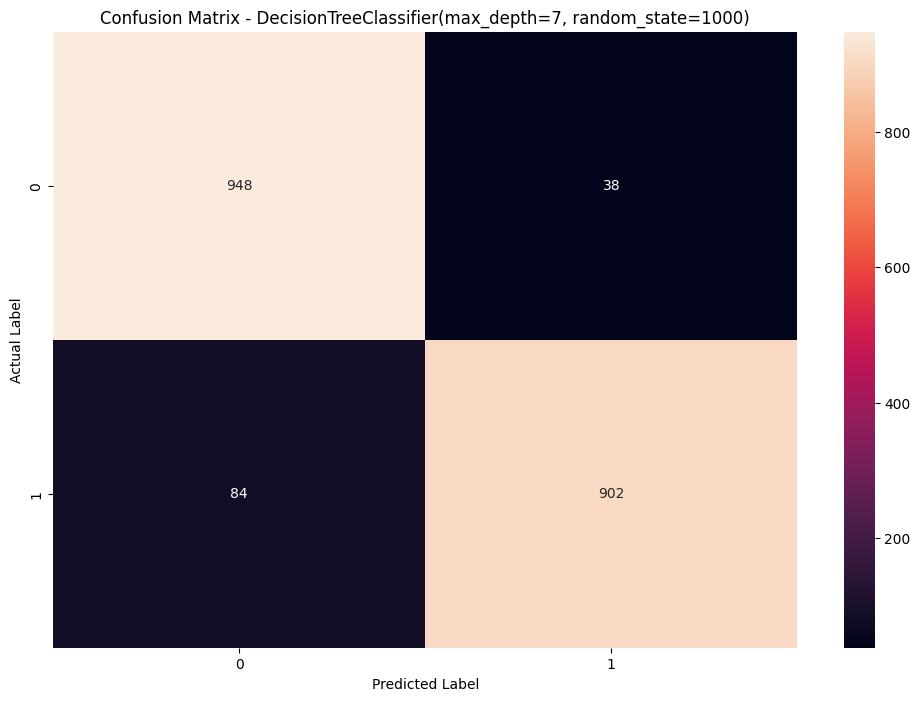

In [ ]:
predicttrain(decision_Tree)

Test Accuracy:
Accuracy: 85.02%
Precision: 86.19%
Recall: 83.40%
F1_Score: 84.77%


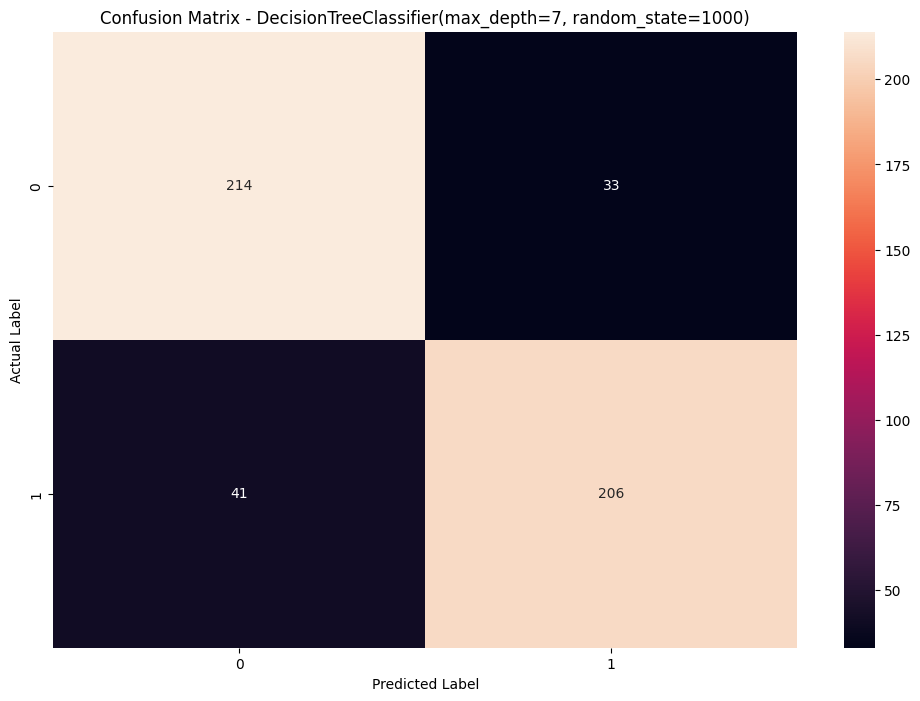

In [ ]:
predicttest(decision_Tree)

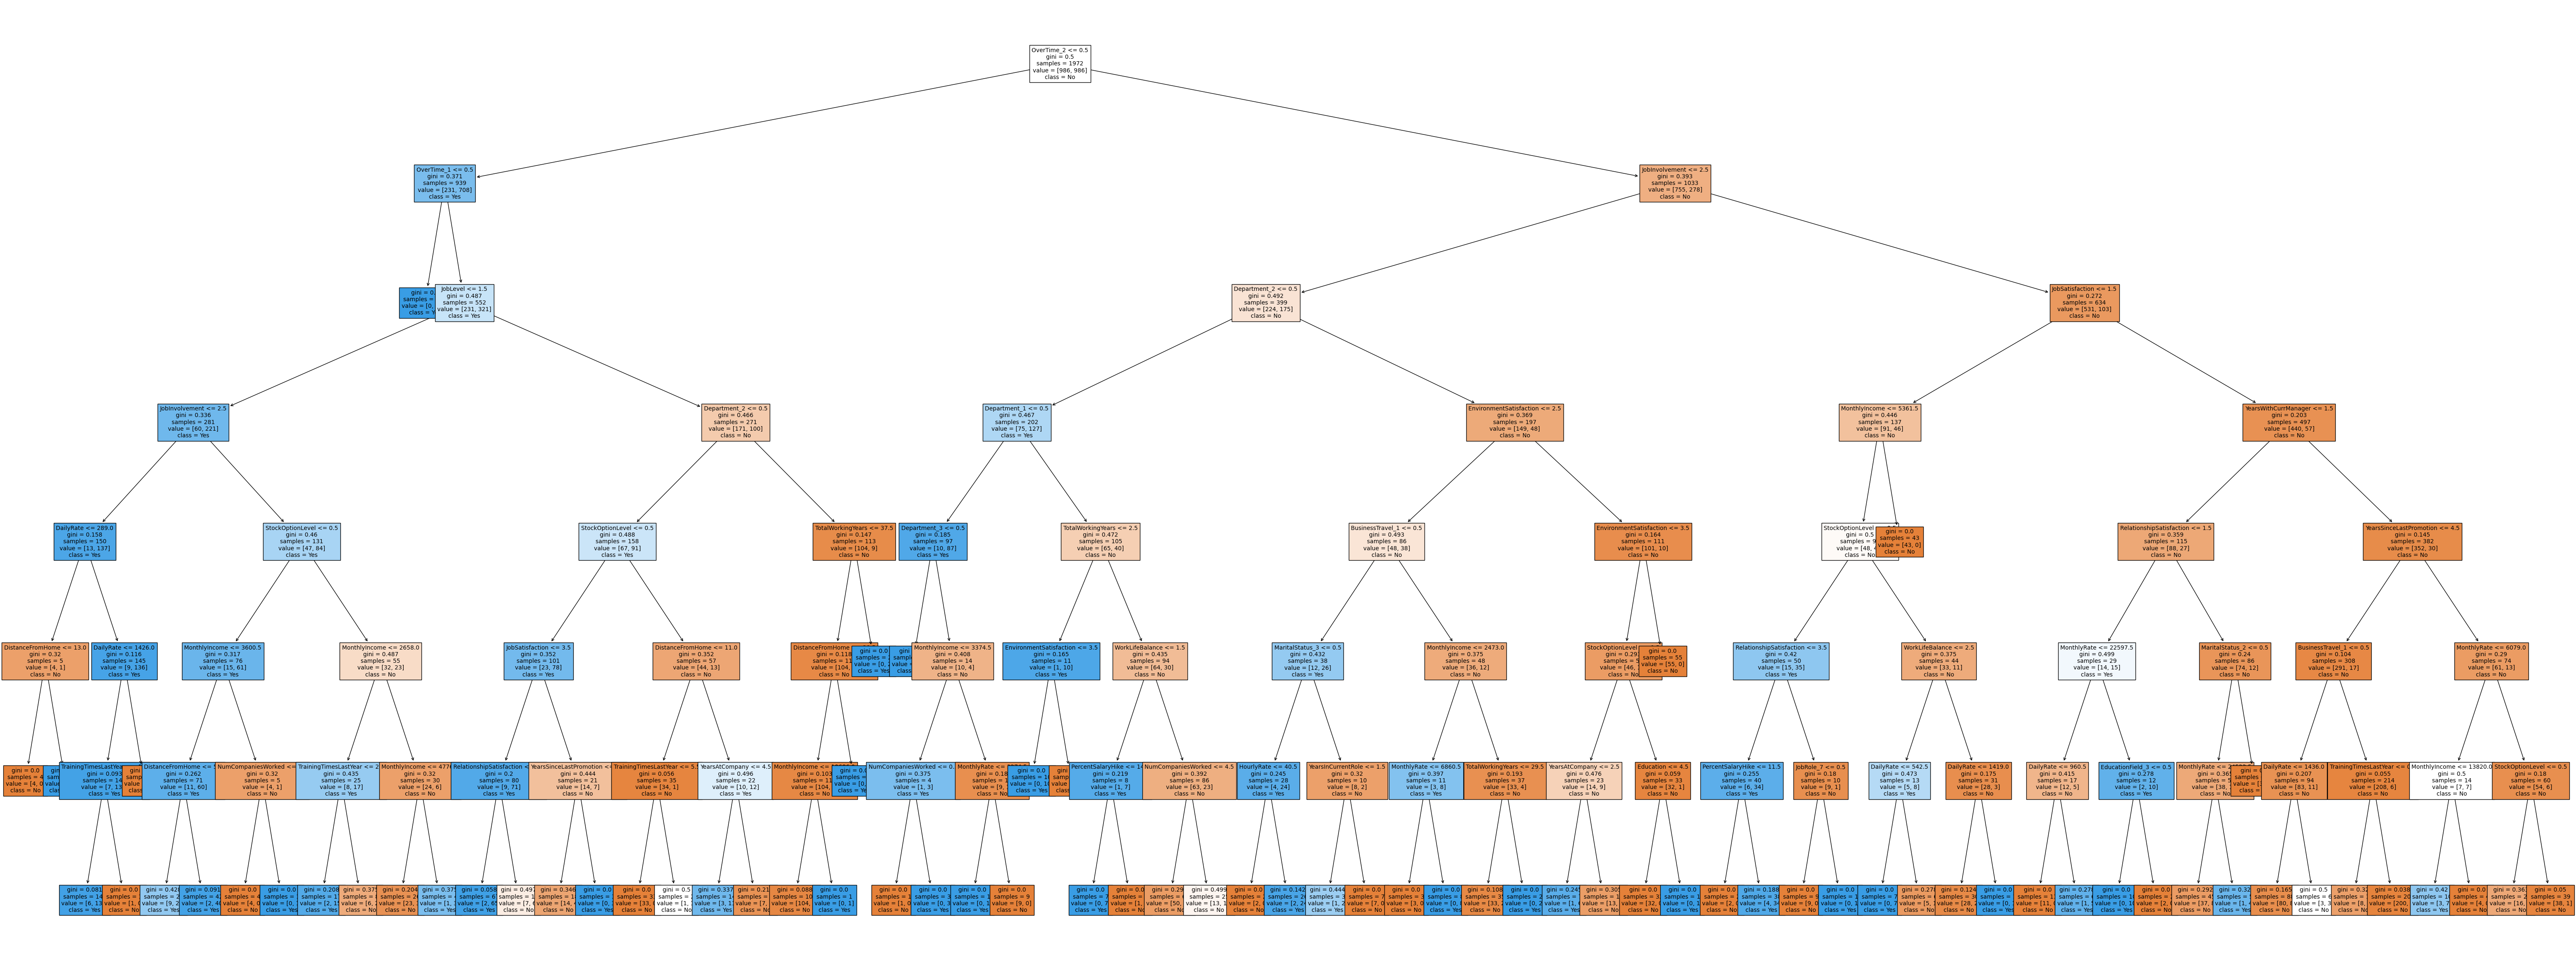

In [ ]:
fig = plt.figure(figsize=(80,30))
tree.plot_tree(decision_Tree, feature_names = list(X_train.columns), class_names = ['No','Yes'], fontsize=10, filled=True)
plt.show()


In [ ]:
# interpret the decision tree with X_test[0]

prediction = decision_Tree.predict([X_test.iloc[0]])
print(f"Prediction for X_test[0]: {prediction}")

# Get the feature importances
importances = decision_Tree.feature_importances_

# Create a dataframe with feature names and importances
feature_importances = pd.DataFrame({"Feature": X_test.columns, "Importance": importances})

# Sort the dataframe by importance in descending order
feature_importances = feature_importances.sort_values("Importance", ascending=False)

# Print the top 5 most important features
print(f"Top 5 most important features:\n{feature_importances.head(5)}")

# Interpret the decision tree for X_test[0]
def interpret_tree(tree, X, y, sample):

  # Get the prediction for the sample
  prediction = tree.predict([X.iloc[sample]])

  # Get the path to the prediction
  path = tree.decision_path([X.iloc[sample]])

  # Initialize the interpretation string
  interpretation = f"Prediction for sample {sample}: {prediction[0]}\n"

  # Iterate through the path to the prediction
  # Convert the sparse matrix to a dense array to iterate properly
  dense_path = path.toarray()[0]
  for node_index, node_value in enumerate(dense_path):
    if node_value == 0:
        continue # Skip nodes that were not traversed

    # Check if the node is a leaf node
    if tree.tree_.feature[node_index] == -2:
        continue  # Skip leaf nodes
    # Get the feature name
    feature_index = tree.tree_.feature[node_index]
    feature_name = X.columns[feature_index]

    # Get the threshold for the split
    threshold = tree.tree_.threshold[node_index]

    # Get the value of the feature for the sample
    sample_value = X.iloc[sample][feature_name]

    # Add the interpretation for the current node
    if node_value == 0:
      interpretation += f"- {feature_name} <= {threshold}: go to left node\n"
    else:
      interpretation += f"- {feature_name} > {threshold}: go to right node\n"

  # Return the interpretation
  return interpretation

# Interpret the decision tree for X_test[0]
interpretation = interpret_tree(decision_Tree, X_test, y_test, 0)
print(interpretation)


Prediction for X_test[0]: [0]
Top 5 most important features:
           Feature  Importance
37      OverTime_2    0.291239
36      OverTime_1    0.100337
6     Department_2    0.078111
19        JobLevel    0.060552
18  JobInvolvement    0.060066
Prediction for sample 0: 0
- OverTime_2 > 0.5: go to right node
- JobInvolvement > 2.5: go to right node
- JobSatisfaction > 1.5: go to right node
- YearsWithCurrManager > 1.5: go to right node
- YearsSinceLastPromotion > 4.5: go to right node
- BusinessTravel_1 > 0.5: go to right node
- TrainingTimesLastYear > 0.5: go to right node



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



**Extracting the Important Features**

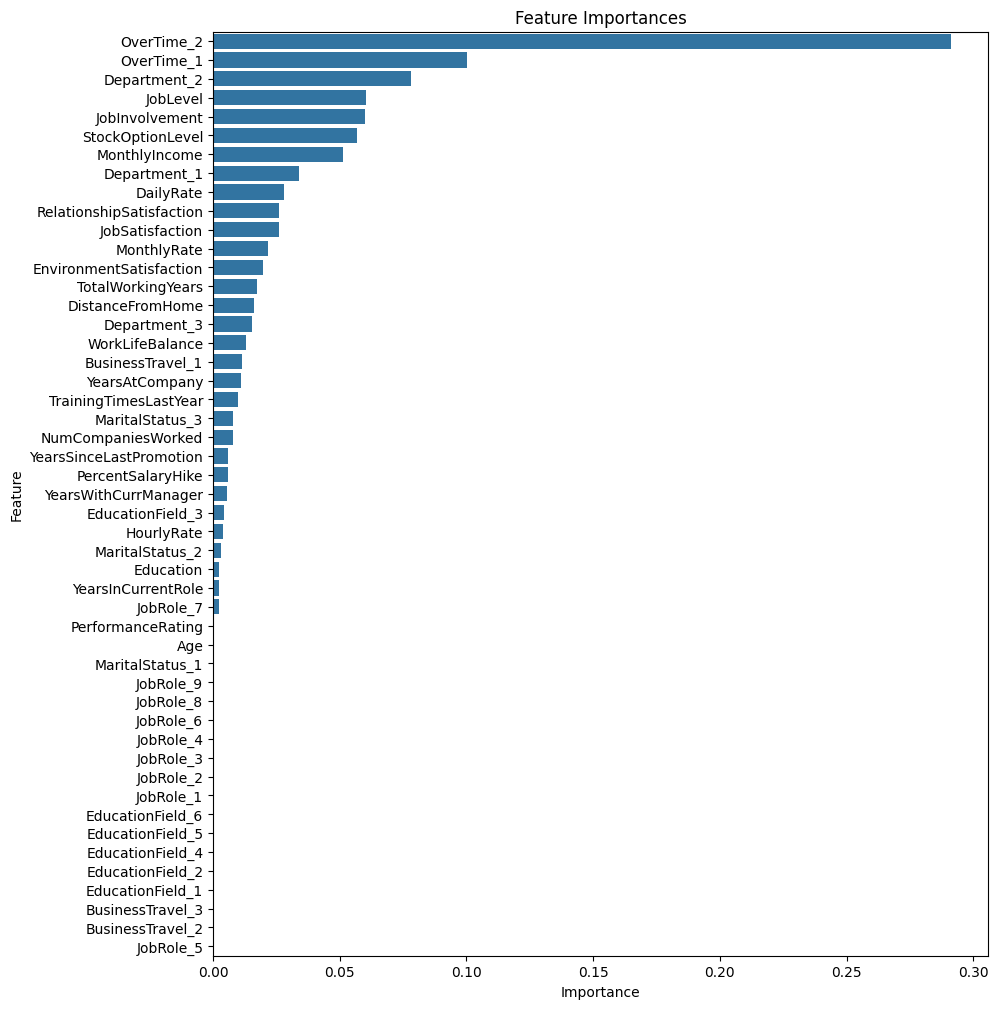

In [ ]:
importances = decision_Tree.feature_importances_

# Create a dataframe with feature names and importances
feature_importances = pd.DataFrame({"Feature": X_test.columns, "Importance": importances})

# Sort the dataframe by importance in descending order
feature_importances = feature_importances.sort_values("Importance", ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 12))
sns.barplot(x="Importance", y="Feature", data=feature_importances)
plt.title("Feature Importances")
plt.show()


In [ ]:
y_test.iloc[0]

0

In [ ]:
X_test.iloc[0]

Age                           31
BusinessTravel_1               1
BusinessTravel_2               0
BusinessTravel_3               0
DailyRate                   1154
Department_1                   1
Department_2                   0
Department_3                   0
DistanceFromHome               2
Education                      2
EducationField_1               1
EducationField_2               0
EducationField_3               0
EducationField_4               0
EducationField_5               0
EducationField_6               0
EnvironmentSatisfaction        1
HourlyRate                    54
JobInvolvement                 3
JobLevel                       1
JobRole_1                      0
JobRole_2                      0
JobRole_3                      0
JobRole_4                      0
JobRole_5                      0
JobRole_6                      0
JobRole_7                      1
JobRole_8                      0
JobRole_9                      0
JobSatisfaction                3
MaritalSta

In [ ]:
# Save the decision tree model to a file
joblib.dump(decision_Tree, 'DecisionTree.pkl')

# Load the saved model
loaded_model = joblib.load('DecisionTree.pkl')

In [ ]:
print(f"Prediction for X_test[0]:",loaded_model.predict([X_test.iloc[0]]))

Prediction for X_test[0]: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



**Random Forest**

Training Accuracy:
Accuracy: 99.29%
Precision: 99.80%
Recall: 98.78%
F1_Score: 99.29%


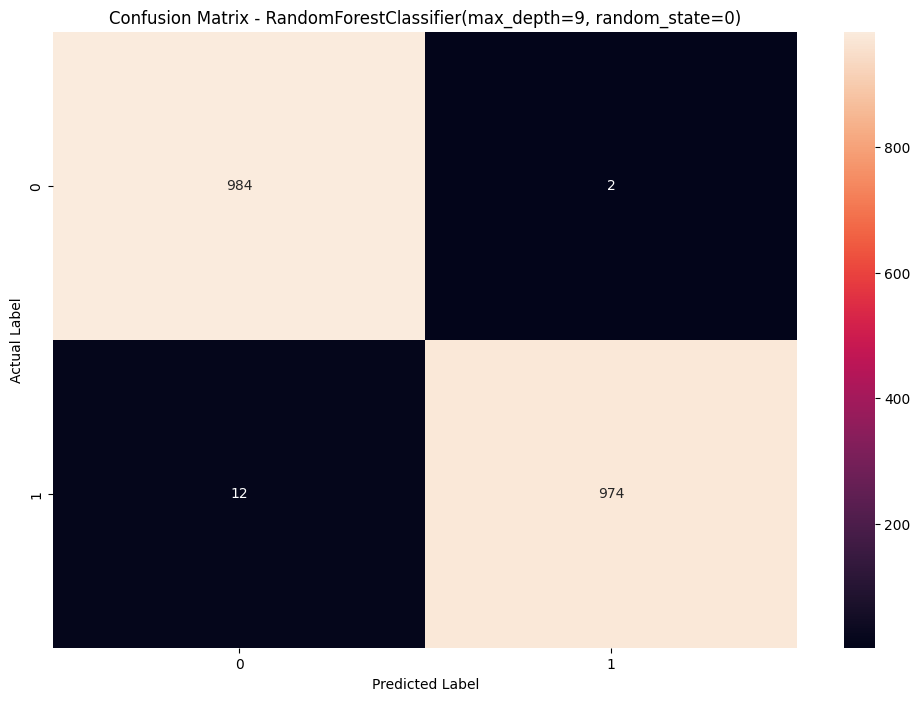

In [ ]:
random_Forest = RandomForestClassifier(max_depth = 9,random_state = 0)
predicttrain(random_Forest)

Test Accuracy:
Accuracy: 90.49%
Precision: 96.30%
Recall: 84.21%
F1_Score: 89.85%


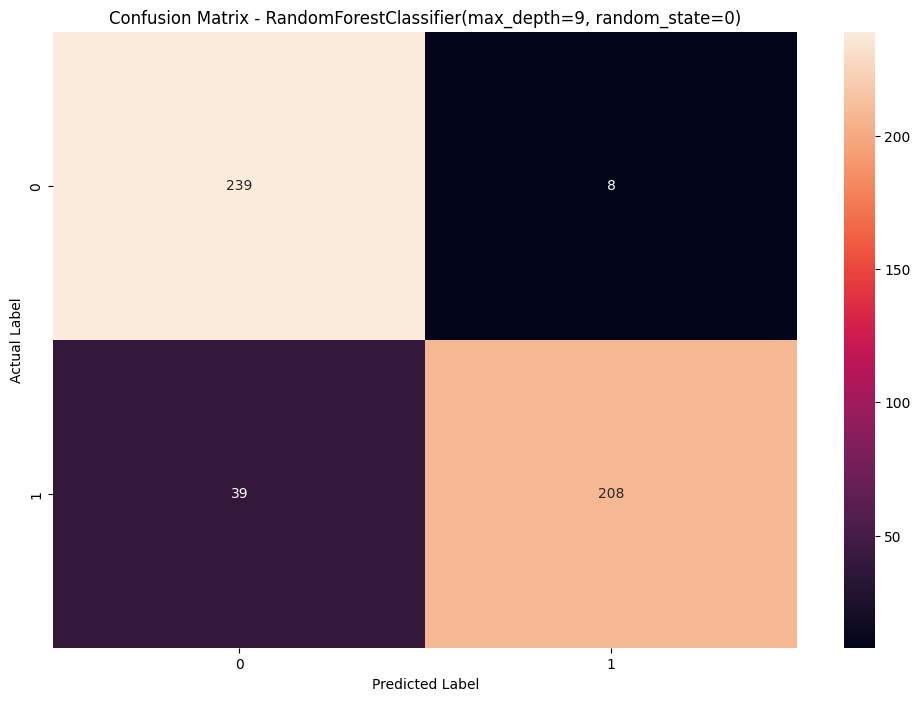

In [ ]:
predicttest(random_Forest)

In [ ]:
# Save the Random Forest model to a file
joblib.dump(random_Forest, 'Random Forest.pkl')

# Load the saved model
loaded_model = joblib.load('Random Forest.pkl')

**XGBoost Classifier-Simple**

Training Accuracy:
Accuracy: 99.95%
Precision: 100.00%
Recall: 99.90%
F1_Score: 99.95%


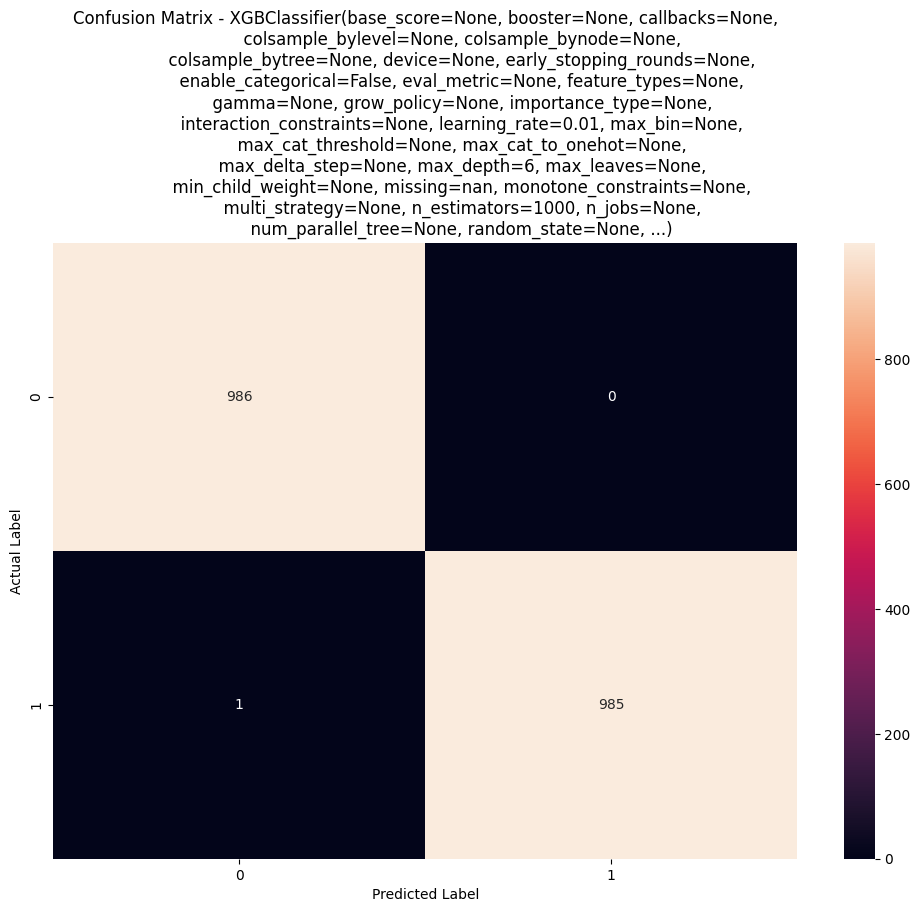

In [ ]:
xgboost = XGBClassifier(learning_rate= 0.01,max_depth = 6,n_estimators = 1000)
predicttrain(xgboost)

Test Accuracy:
Accuracy: 91.50%
Precision: 95.15%
Recall: 87.45%
F1_Score: 91.14%


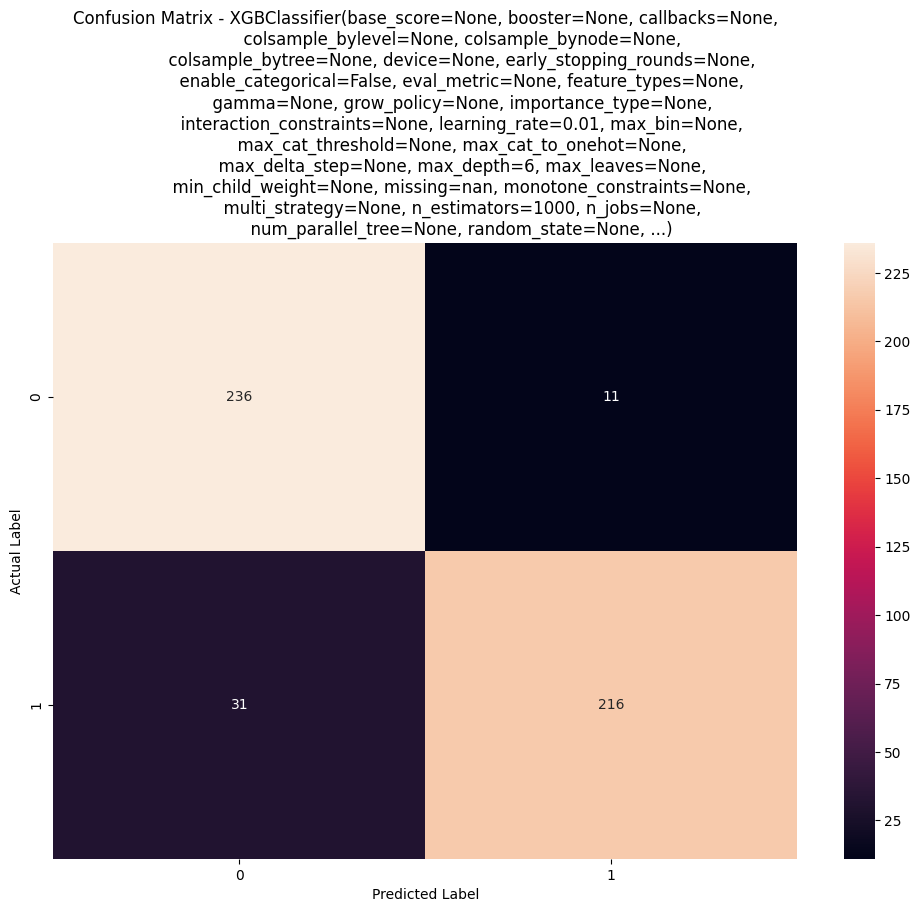

In [ ]:
predicttest(xgboost)

In [ ]:
# Save the Random Forest model to a file
joblib.dump(xgboost, 'XGBoost.pkl')

# Load the saved model
loaded_model = joblib.load('XGBoost.pkl')

**XGBClassifier using GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import time

# Define the model
model = XGBClassifier()

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [4, 6, 8],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 2, 3],
    'gamma': [0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7, 0.8]}

# Perform GridSearchCV
start_time = time.time()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Calculate the time of execution
end_time = time.time()
execution_time = end_time - start_time

# Print the results
print("Time of execution:", execution_time)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Time of execution: 5031.074990749359
Best parameters: {'colsample_bytree': 0.7, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.7}
Best score: 0.9391505493799397


In [ ]:
# Save the Random Forest model to a file
joblib.dump(grid_search, 'XGBoost_GSCV.pkl')

# Load the saved model
loaded_model = joblib.load('XGBoost_GSCV.pkl')

In [ ]:
print('Training Accuracy:')
y_predict = grid_search.predict(X_train)
print('Accuracy: %.2f%%' % (accuracy_score(y_train, y_predict) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_train, y_predict) * 100))
print('Recall: %.2f%%' % (recall_score(y_train, y_predict) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_train, y_predict) * 100))

Training Accuracy:
Accuracy: 99.95%
Precision: 100.00%
Recall: 99.90%
F1_Score: 99.95%


In [ ]:
print('Test Accuracy:')
y_predict = grid_search.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_predict) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, y_predict) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, y_predict) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, y_predict) * 100))

Test Accuracy:
Accuracy: 93.52%
Precision: 97.36%
Recall: 89.47%
F1_Score: 93.25%


**Finally Answering to the Questions!!!!!!!!**

1. What are the most important features?
* OverTime
* Department
* JobLevel
* JobInvolvement
* StockOptionLevel
are the Five most Important Features

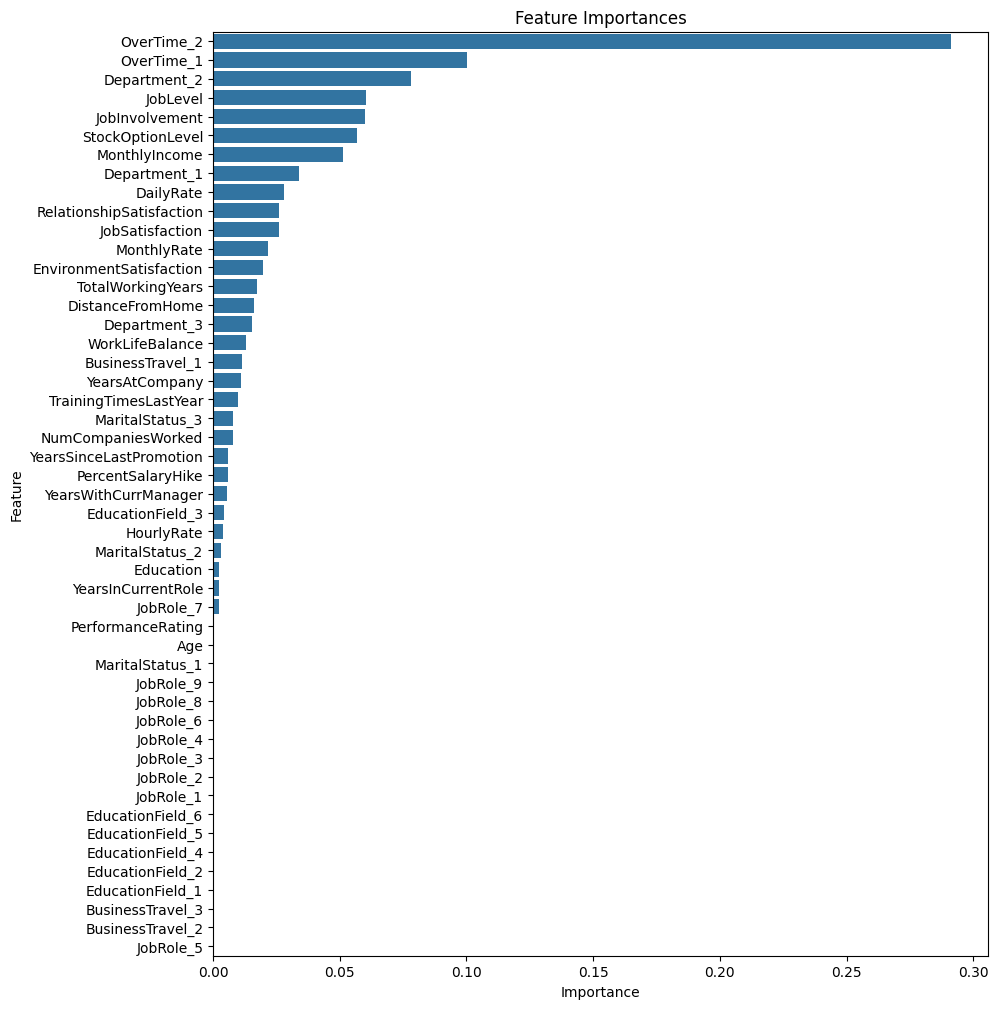

2. Which of the models you developed works best and why?

* All the Modes that I have tried gave accuracy above 93% for Training Data.
* Coming to Test Data, Got above 85% for all models.
* **XGBClassifier using GridSearchCV** is the Best model which gave accuracy of **99.95% on Training Data and 93.53% on Test Data**.

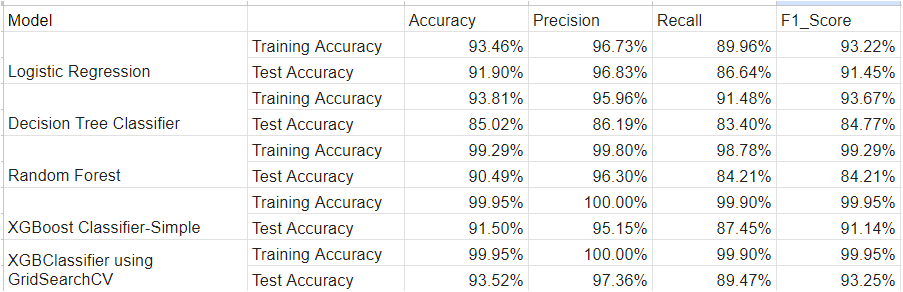

3. Does the data set contain bias? if so, how did you handle bais?

* The Dataset which is given was Highly Imbalanced with Employee left the company
with 237 examples and Employee continued with the company of 1233 examples.

* To addresses imbalance Isuue, We are using SMOTE(Synthetic Minority Oversampling Technique), an oversampling technique to increase the number of data points in the minority class.

4. Were you able to develop an interpretable model ? if so, how? if not, why?

Interpreted the Model using Decision Tree with X_test.iloc[0]

Prediction for sample 0: 0
- OverTime_2 > 0.5: go to right node
- JobInvolvement > 2.5: go to right node
- JobSatisfaction > 1.5: go to right node
- YearsWithCurrManager > 1.5: go to right node
- YearsSinceLastPromotion > 4.5: go to right node
- BusinessTravel_1 > 0.5: go to right node
- TrainingTimesLastYear > 0.5: go to right node


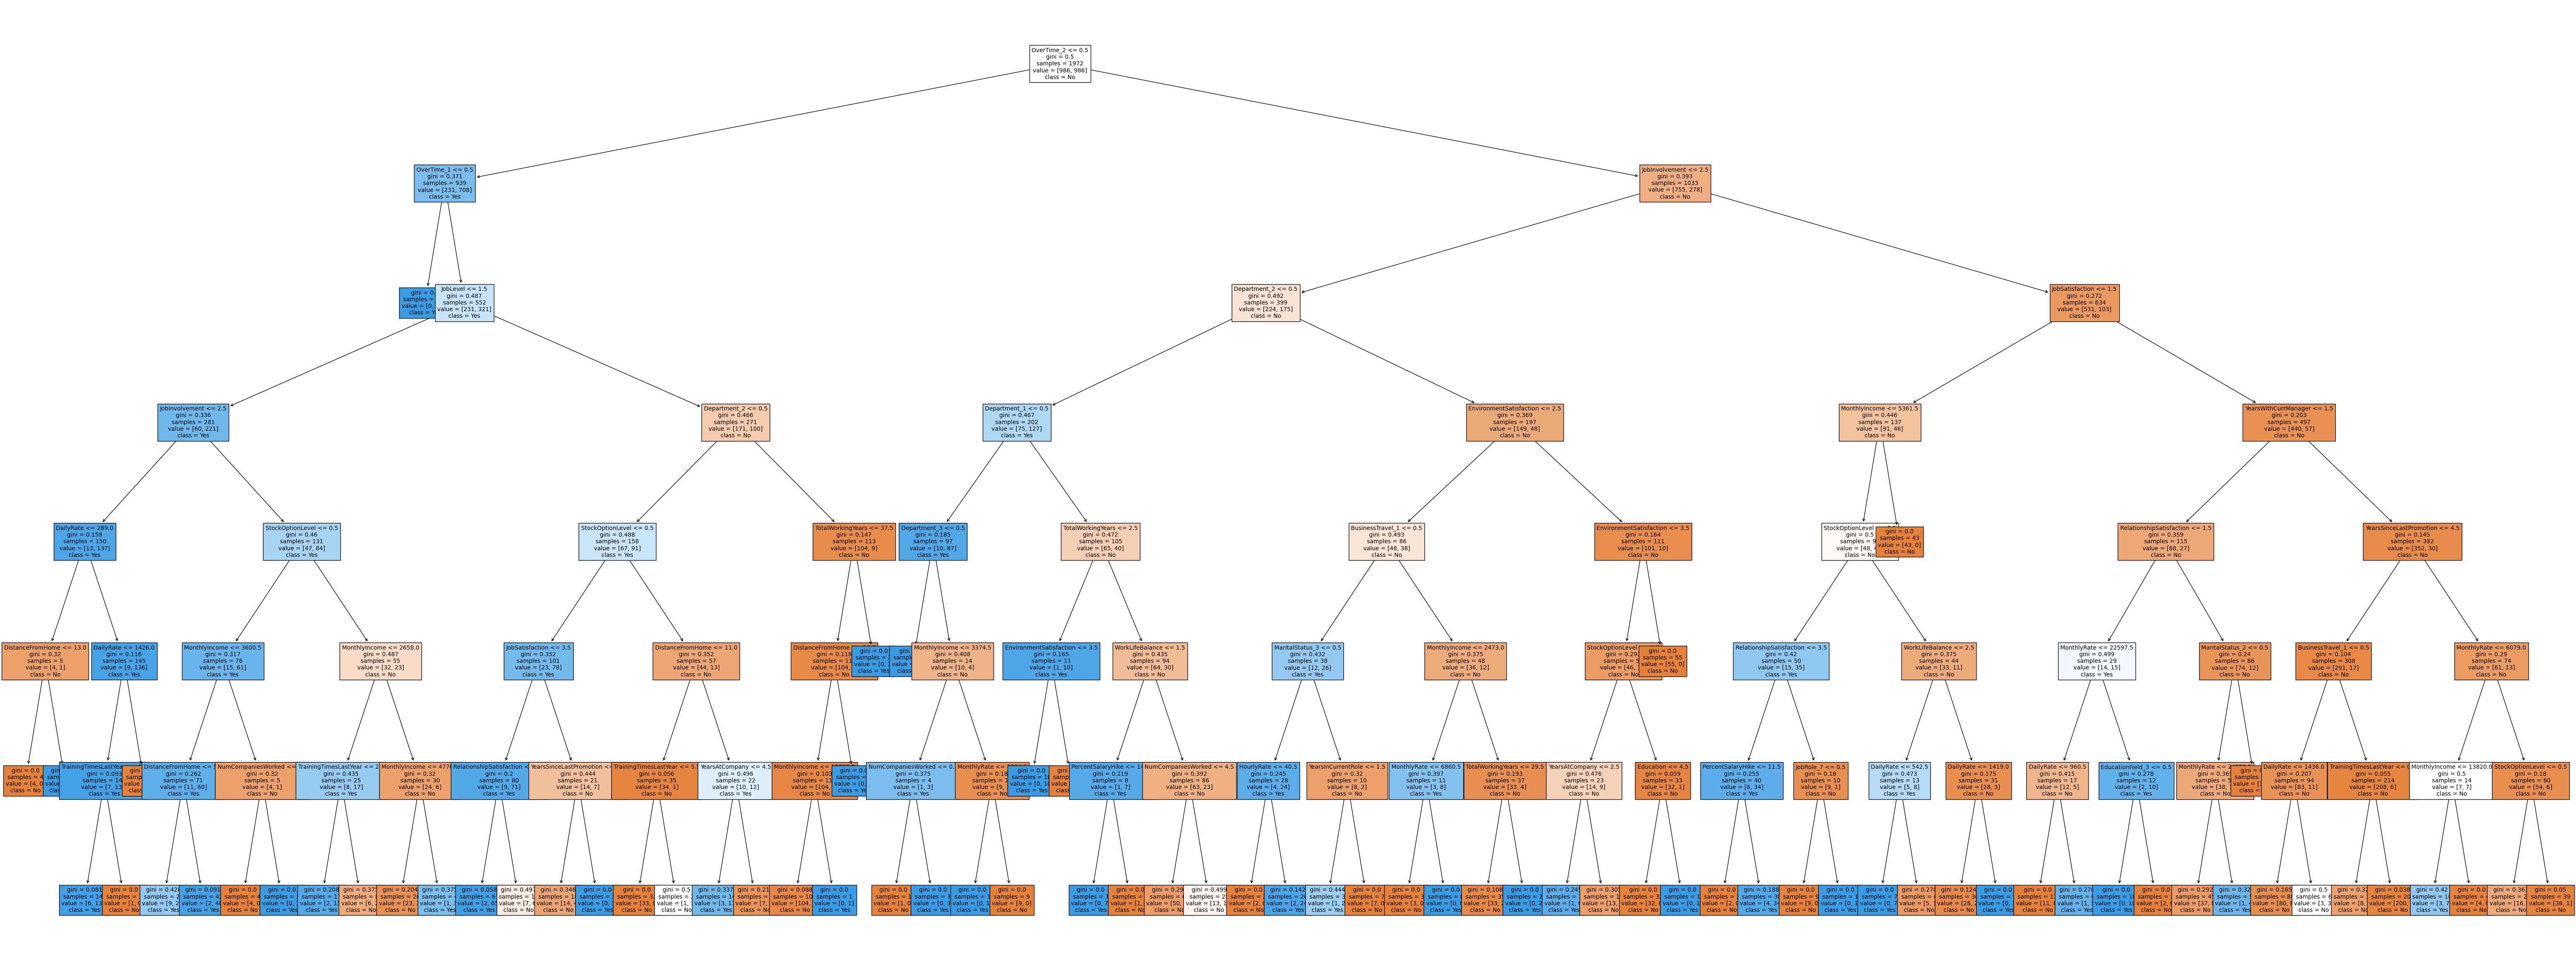